### Quistian Navarro Juan Luis
### Procesamiento digital de imagenes

El procesamiento de imágenes digitales o filtro de imagen es el conjunto de técnicas que se aplican a las imágenes digitales con el objetivo de mejorar la calidad o facilitar la búsqueda de información.


**en este notebook se muestran los pasos siguientes**:

1. Cambiar la imagen a escala de grises y guardarla aparte
2. Ecualizar el histrograma de la imagen a escala de grises
3. Ecualizar el histograma de la imagen original (en el espacio YCrCb)
4. Comparar las dos ecualizaciones

In [20]:
import cv2
import matplotlib.pyplot as plt

In [21]:
img_path = "images/866-536x354.jpg"

In [22]:
# Function to display the image
def plot_img(img, cmap = None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    print(img.shape)

In [23]:
# Function to display the histogram
def plot_hist(img, title=None, is_gray=False):
    if is_gray:
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist, color='black') # Plot histogram for grayscale image
    else:
        colors = ('b', 'g', 'r') # Define color channels
        for i, color in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color) # Plot histogram for each color channel
    if title:
        plt.title(title)
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.show()

### Original Image

(354, 536, 3)


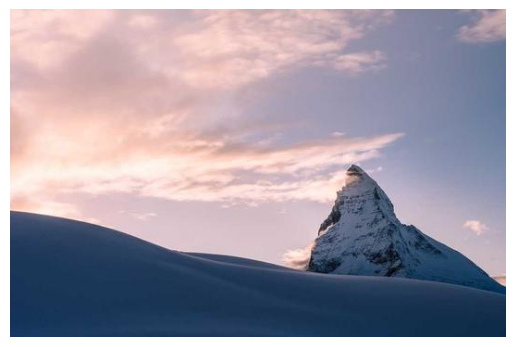

In [24]:
img = cv2.imread(img_path)
plot_img(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

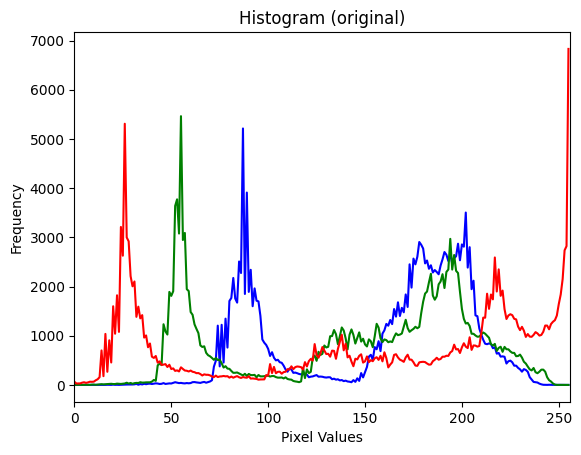

In [25]:
plot_hist(img, title='Histogram (original)')

### Gray scale image

(354, 536)


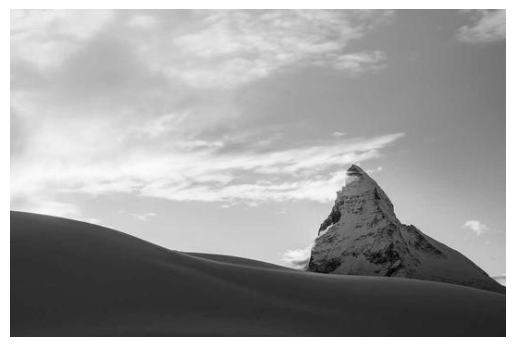

In [26]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
plot_img(gray_img, cmap='gray')

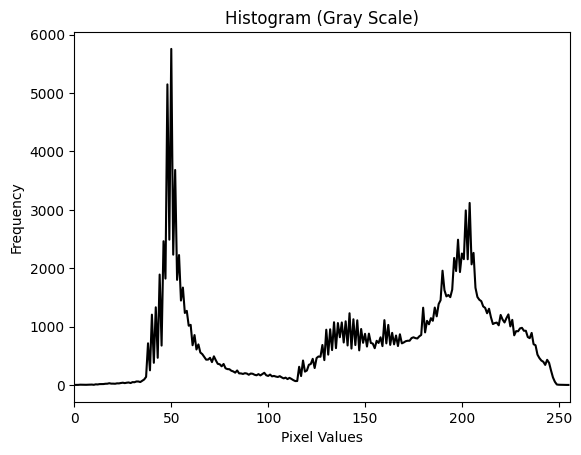

In [27]:
plot_hist(gray_img, title='Histogram (Gray Scale)', is_gray=True)

### Equalized image

(354, 536)


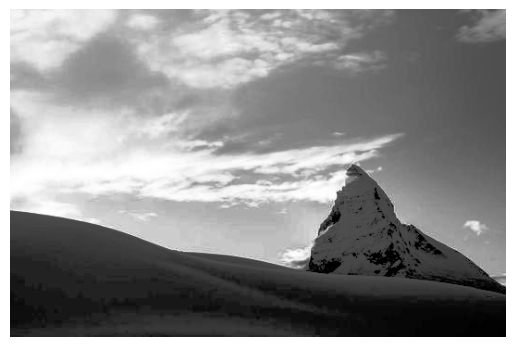

In [28]:
eq_img = cv2.equalizeHist(gray_img) # Apply histogram equalization
plot_img(eq_img, cmap='gray')

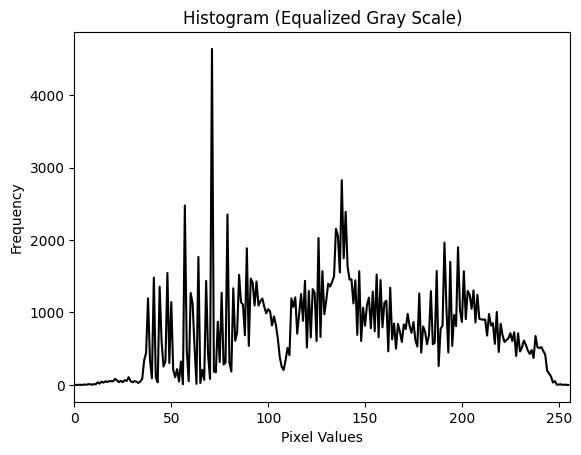

In [34]:
plot_hist(eq_img, title='Histogram (Equalized Gray Scale)', is_gray=True)

### YCrCb image

(354, 536, 3)


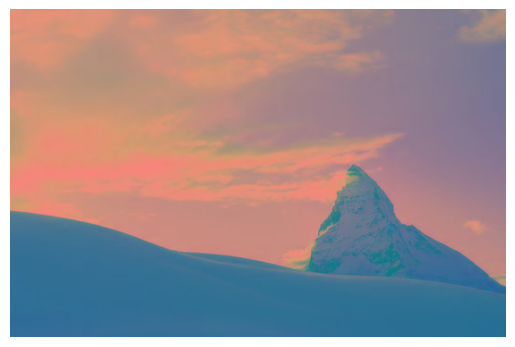

In [30]:
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Convert to YCrCb color space
plot_img(ycrcb_img)

(354, 536, 3)


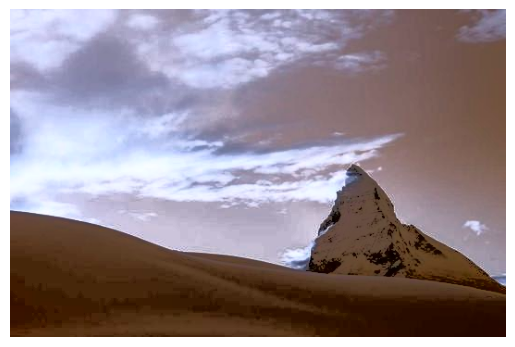

In [31]:
y, cr, cb = cv2.split(ycrcb_img) # Split channels
eq_y = cv2.equalizeHist(y) # Equalize the Y channel

eq_ycrcb_img = cv2.merge([eq_y, cr, cb]) # Merge channels back
eq_img = cv2.cvtColor(eq_ycrcb_img, cv2.COLOR_YCrCb2BGR)  # Convert back to BGR

plot_img(eq_img, cmap='gray')

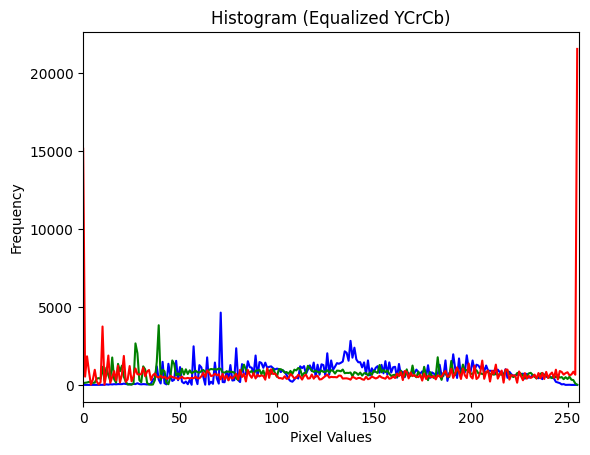

In [33]:
plot_hist(eq_img, title='Histogram (Equalized YCrCb)')

### Descripción de las funciones utilizadas:
* **plot_img**: Muestra la imagen en un gráfico, con opción de usar una escala de grises o un mapa de colores personalizado (cmap).
* **plot_hist**: Genera y muestra el histograma de una imagen. Si la imagen es en escala de grises, se muestra un único histograma en color negro; para imágenes en color, se muestran histogramas separados para cada canal (azul, verde, rojo).
* **cv2.cvtColor**: Convierte la imagen entre diferentes espacios de color, como de BGR a escala de grises (cv2.COLOR_BGR2GRAY) o de BGR a YCrCb (cv2.COLOR_BGR2YCrCb).
* **cv2.equalizeHist**: Aplica la ecualización del histograma para mejorar el contraste de la imagen, ya sea en escala de grises o en el canal Y de YCrCb.
* **cv2.calcHist**: Calcula el histograma de una imagen. Se usa en la función plot_hist para obtener la distribución de los valores de píxeles en la imagen.
* **cv2.merge**
: Esta función combina varios canales de una imagen en una sola imagen multicanal. Se usa para fusionar las diferentes componentes de una imagen, como los canales de color en el espacio YCrCb o los canales en un formato separado### Comparación entre las ecualizaciones:
* **cv2.split**: Esta función descompone una imagen multicanal en sus componentes individuales. Se usa para separar una imagen en sus canales de color o luminancia individuales. 
  

### descripcion de ecualizaciones
* Ecualización en escala de grises (Gray Scale): Aumenta el contraste en toda la imagen, mejorando la visibilidad de los detalles, especialmente en áreas oscuras.
* Ecualización en el espacio YCrCb: Solo afecta el canal de luminancia (Y), conservando los colores originales en los canales Cr y Cb, lo que mejora el contraste sin alterar la fidelidad del color.

### YCbCr
El espacio de color YCbCr se utiliza ampliamente para el vídeo digital. En este formato, la información de luminancia se almacena como un único componente (Y) y la información de crominancia se almacena como dos componentes de diferencia de color (Cb y Cr). Cb y Cr representan la diferencia entre un valor de referencia y el componente azul o rojo, respectivamente. (YUV, otro espacio de color ampliamente utilizado para el vídeo digital, es muy similar a YCbCr, pero no idéntico).

| Atributo | Descripción |
|----------|-------------|
| Y        | Luminancia o brillo de la imagen. Los colores aumentan en brillo como aumentos de Y. |
| Cb       | Valor de crominancia que indica la diferencia entre el componente azul y un valor de referencia. |
| Cr       | Valor de crominancia que indica la diferencia entre el componente rojo y un valor de referencia. |


### Referencias:
opencv "Histogram Equalization"
https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

mathworks "Comprender los espacios de color y la conversión entre ellos" 
https://la.mathworks.com/help/images/understanding-color-spaces-and-color-space-conversion.html